In [2]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings

warnings.filterwarnings('ignore')


In [3]:
# Function to preprocess images
def preprocess_image(img_path):
    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (128, 128))
    return resized

# Function to display images
def display_images(images, labels, categories, title, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(min(num_images, len(images))):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(categories[labels[i]])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

In [4]:
# Directory paths
data_dir = 'A:/code/Dp2/Posture-Detector/postures'
categories = ['bad', 'good']
images = []
labels = []

# Load images and labels
for category in categories:
    path = os.path.join(data_dir, category)
    label = categories.index(category)
    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        image = preprocess_image(img_path)
        images.append(image)
        labels.append(label)

In [5]:
# Convert lists to numpy arrays
X = np.array(images)
y = np.array(labels)

# Extract HOG features
hog_features = []
for img in X:
    fd = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=False)
    hog_features.append(fd)

X_features = np.array(hog_features)

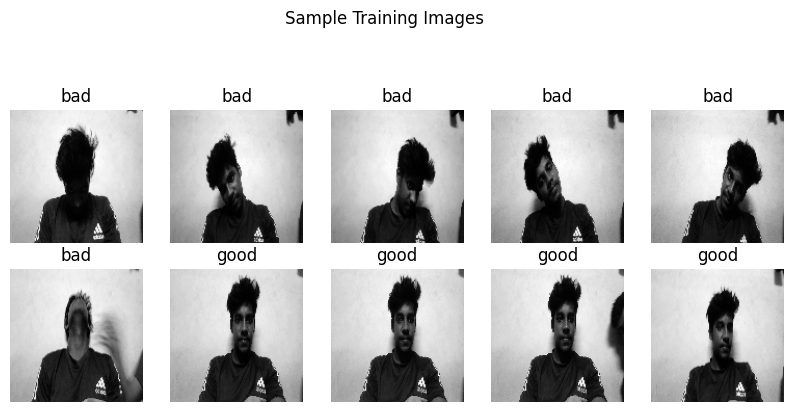

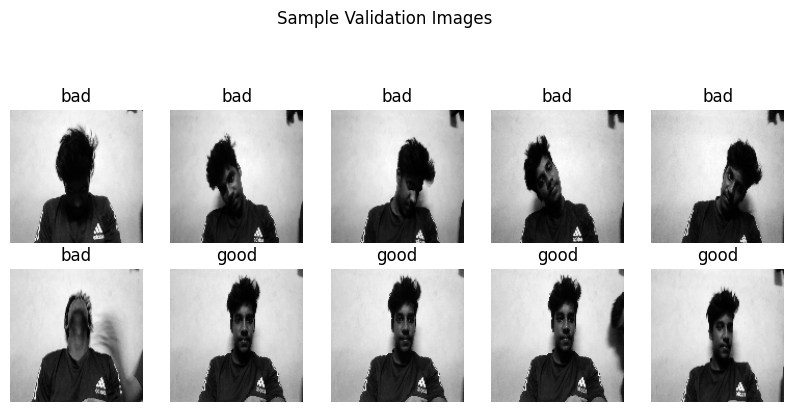

In [6]:
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Display sample training images (original images)
display_images(X[np.isin(y, y_train)][:25], y[np.isin(y, y_train)][:25], categories, "Sample Training Images")

# Display sample validation images (original images)
display_images(X[np.isin(y, y_valid)][:25], y[np.isin(y, y_valid)][:25], categories, "Sample Validation Images")


In [7]:
# Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [8]:
# Evaluate the model
y_pred = svm_model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print("SVM Model Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_valid, y_pred))


SVM Model Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



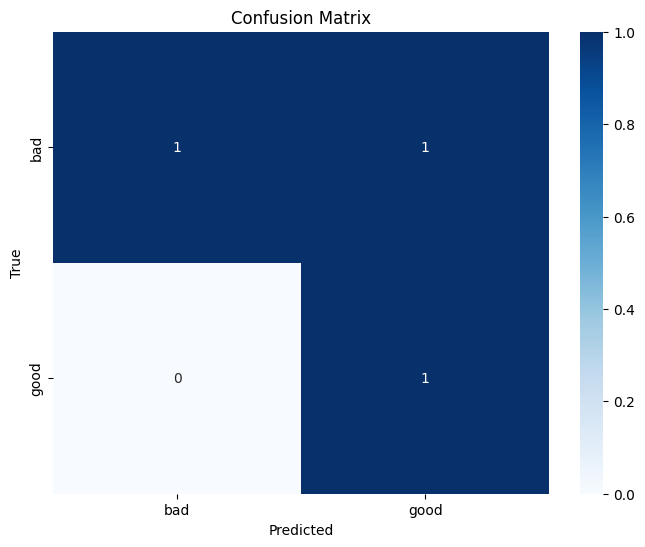

In [9]:
# Plot Confusion Matrix
cm = confusion_matrix(y_valid, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [10]:
# Save the model
model_filename = 'posture_detector_model.pkl'
joblib.dump(svm_model, model_filename)
print(f"Model saved as '{model_filename}'")

Model saved as 'posture_detector_model.pkl'
